#### 1. Importing libraries and defining util functions

In [115]:
from IPython.display import display

import os

import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt

from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
)
from scipy.stats import uniform
from sklearn.metrics import classification_report

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

In [98]:
def classification_report2(model, X_test, y_test):
    y_pred = model.predict(X_test)
    data = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(data).transpose()
    df["model"] = str(model)
    return df

def train_model(model, X_train, X_test, y_train, y_test, disp=True):
    model = model.fit(X_train, y_train)
    clf_report = classification_report2(model, X_test, y_test)
    cv_score = cross_val_score(model, X, y)
    
    if disp:
        print(model)
        display(clf_report)
        print(f"CV score: {cv_score}")
        print(f"CV score mean: {cv_score.mean()}")
    
    return model, clf_report, cv_score

#### 2. Load dataset

In [2]:
heroes = pd.read_csv("../data/heroes.csv")

In [3]:
heroes.head(3)

,name,attack_type,role,health,attack,attack_spd
0,Artanis,Melee,Bruiser,2470.0,111.0,1.00
1,Chen,Melee,Bruiser,2473.0,90.0,1.11
2,Dehaka,Melee,Bruiser,2434.0,100.0,1.11


In [71]:
feature_names = ["health", "attack", "attack_spd"]
target = "attack_type"
class_names = heroes[target].unique()

X, y = heroes[feature_names], heroes[target]

In [6]:
X.head(3)

,health,attack,attack_spd
0,2470.0,111.0,1.00
1,2473.0,90.0,1.11
2,2434.0,100.0,1.11


In [7]:
y.head(3)

0    Melee
1    Melee
2    Melee
Name: attack_type, dtype: object

#### 3. Train-Test split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42)

#### 4. Training and comparing models

In [87]:
dummy_clf, dummy_clf_report, dummy_cv_score = train_model(
    DummyClassifier(), X_train, X_test, y_train, y_test)

DummyClassifier()


C:\Users\kingZthefirst\Anaconda3\envs\hots\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\Users\kingZthefirst\Anaconda3\envs\hots\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


,precision,recall,f1-score,support,model
Melee,0.600000,0.500000,0.545455,6.000000,DummyClassifier()
Ranged,0.250000,0.333333,0.285714,3.000000,DummyClassifier()
accuracy,0.444444,0.444444,0.444444,0.444444,DummyClassifier()
macro avg,0.425000,0.416667,0.415584,9.000000,DummyClassifier()
weighted avg,0.483333,0.444444,0.458874,9.000000,DummyClassifier()


CV score: [0.35294118 0.70588235 0.52941176 0.70588235 0.75      ]
CV score mean: 0.6088235294117648


In [100]:
logistic_clf, logistic_clf_report, logistic_cv_score = train_model(
    LogisticRegression(), X_train, X_test, y_train, y_test)

LogisticRegression()


,precision,recall,f1-score,support,model
Melee,1.000000,0.833333,0.909091,6.000000,LogisticRegression()
Ranged,0.750000,1.000000,0.857143,3.000000,LogisticRegression()
accuracy,0.888889,0.888889,0.888889,0.888889,LogisticRegression()
macro avg,0.875000,0.916667,0.883117,9.000000,LogisticRegression()
weighted avg,0.916667,0.888889,0.891775,9.000000,LogisticRegression()


CV score: [0.94117647 0.70588235 0.76470588 0.70588235 0.75      ]
CV score mean: 0.7735294117647059


In [101]:
gnb_clf, gnb_clf_report, gnb_cv_score = train_model(
    GaussianNB(), X_train, X_test, y_train, y_test)

GaussianNB()


,precision,recall,f1-score,support,model
Melee,0.833333,0.833333,0.833333,6.000000,GaussianNB()
Ranged,0.666667,0.666667,0.666667,3.000000,GaussianNB()
accuracy,0.777778,0.777778,0.777778,0.777778,GaussianNB()
macro avg,0.750000,0.750000,0.750000,9.000000,GaussianNB()
weighted avg,0.777778,0.777778,0.777778,9.000000,GaussianNB()


CV score: [0.58823529 0.52941176 0.76470588 0.70588235 0.875     ]
CV score mean: 0.6926470588235294


In [102]:
knn_clf, knn_clf_report, knn_cv_score = train_model(
    KNeighborsClassifier(), X_train, X_test, y_train, y_test)

KNeighborsClassifier()


,precision,recall,f1-score,support,model
Melee,1.000000,0.833333,0.909091,6.000000,KNeighborsClassifier()
Ranged,0.750000,1.000000,0.857143,3.000000,KNeighborsClassifier()
accuracy,0.888889,0.888889,0.888889,0.888889,KNeighborsClassifier()
macro avg,0.875000,0.916667,0.883117,9.000000,KNeighborsClassifier()
weighted avg,0.916667,0.888889,0.891775,9.000000,KNeighborsClassifier()


CV score: [0.76470588 0.76470588 0.70588235 0.76470588 0.75      ]
CV score mean: 0.75


In [103]:
decision_clf, decision_clf_report, decision_cv_score = train_model(
    DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

DecisionTreeClassifier()


,precision,recall,f1-score,support,model
Melee,1.000000,0.833333,0.909091,6.000000,DecisionTreeClassifier()
Ranged,0.750000,1.000000,0.857143,3.000000,DecisionTreeClassifier()
accuracy,0.888889,0.888889,0.888889,0.888889,DecisionTreeClassifier()
macro avg,0.875000,0.916667,0.883117,9.000000,DecisionTreeClassifier()
weighted avg,0.916667,0.888889,0.891775,9.000000,DecisionTreeClassifier()


CV score: [0.76470588 0.64705882 0.58823529 0.76470588 0.6875    ]
CV score mean: 0.6904411764705882


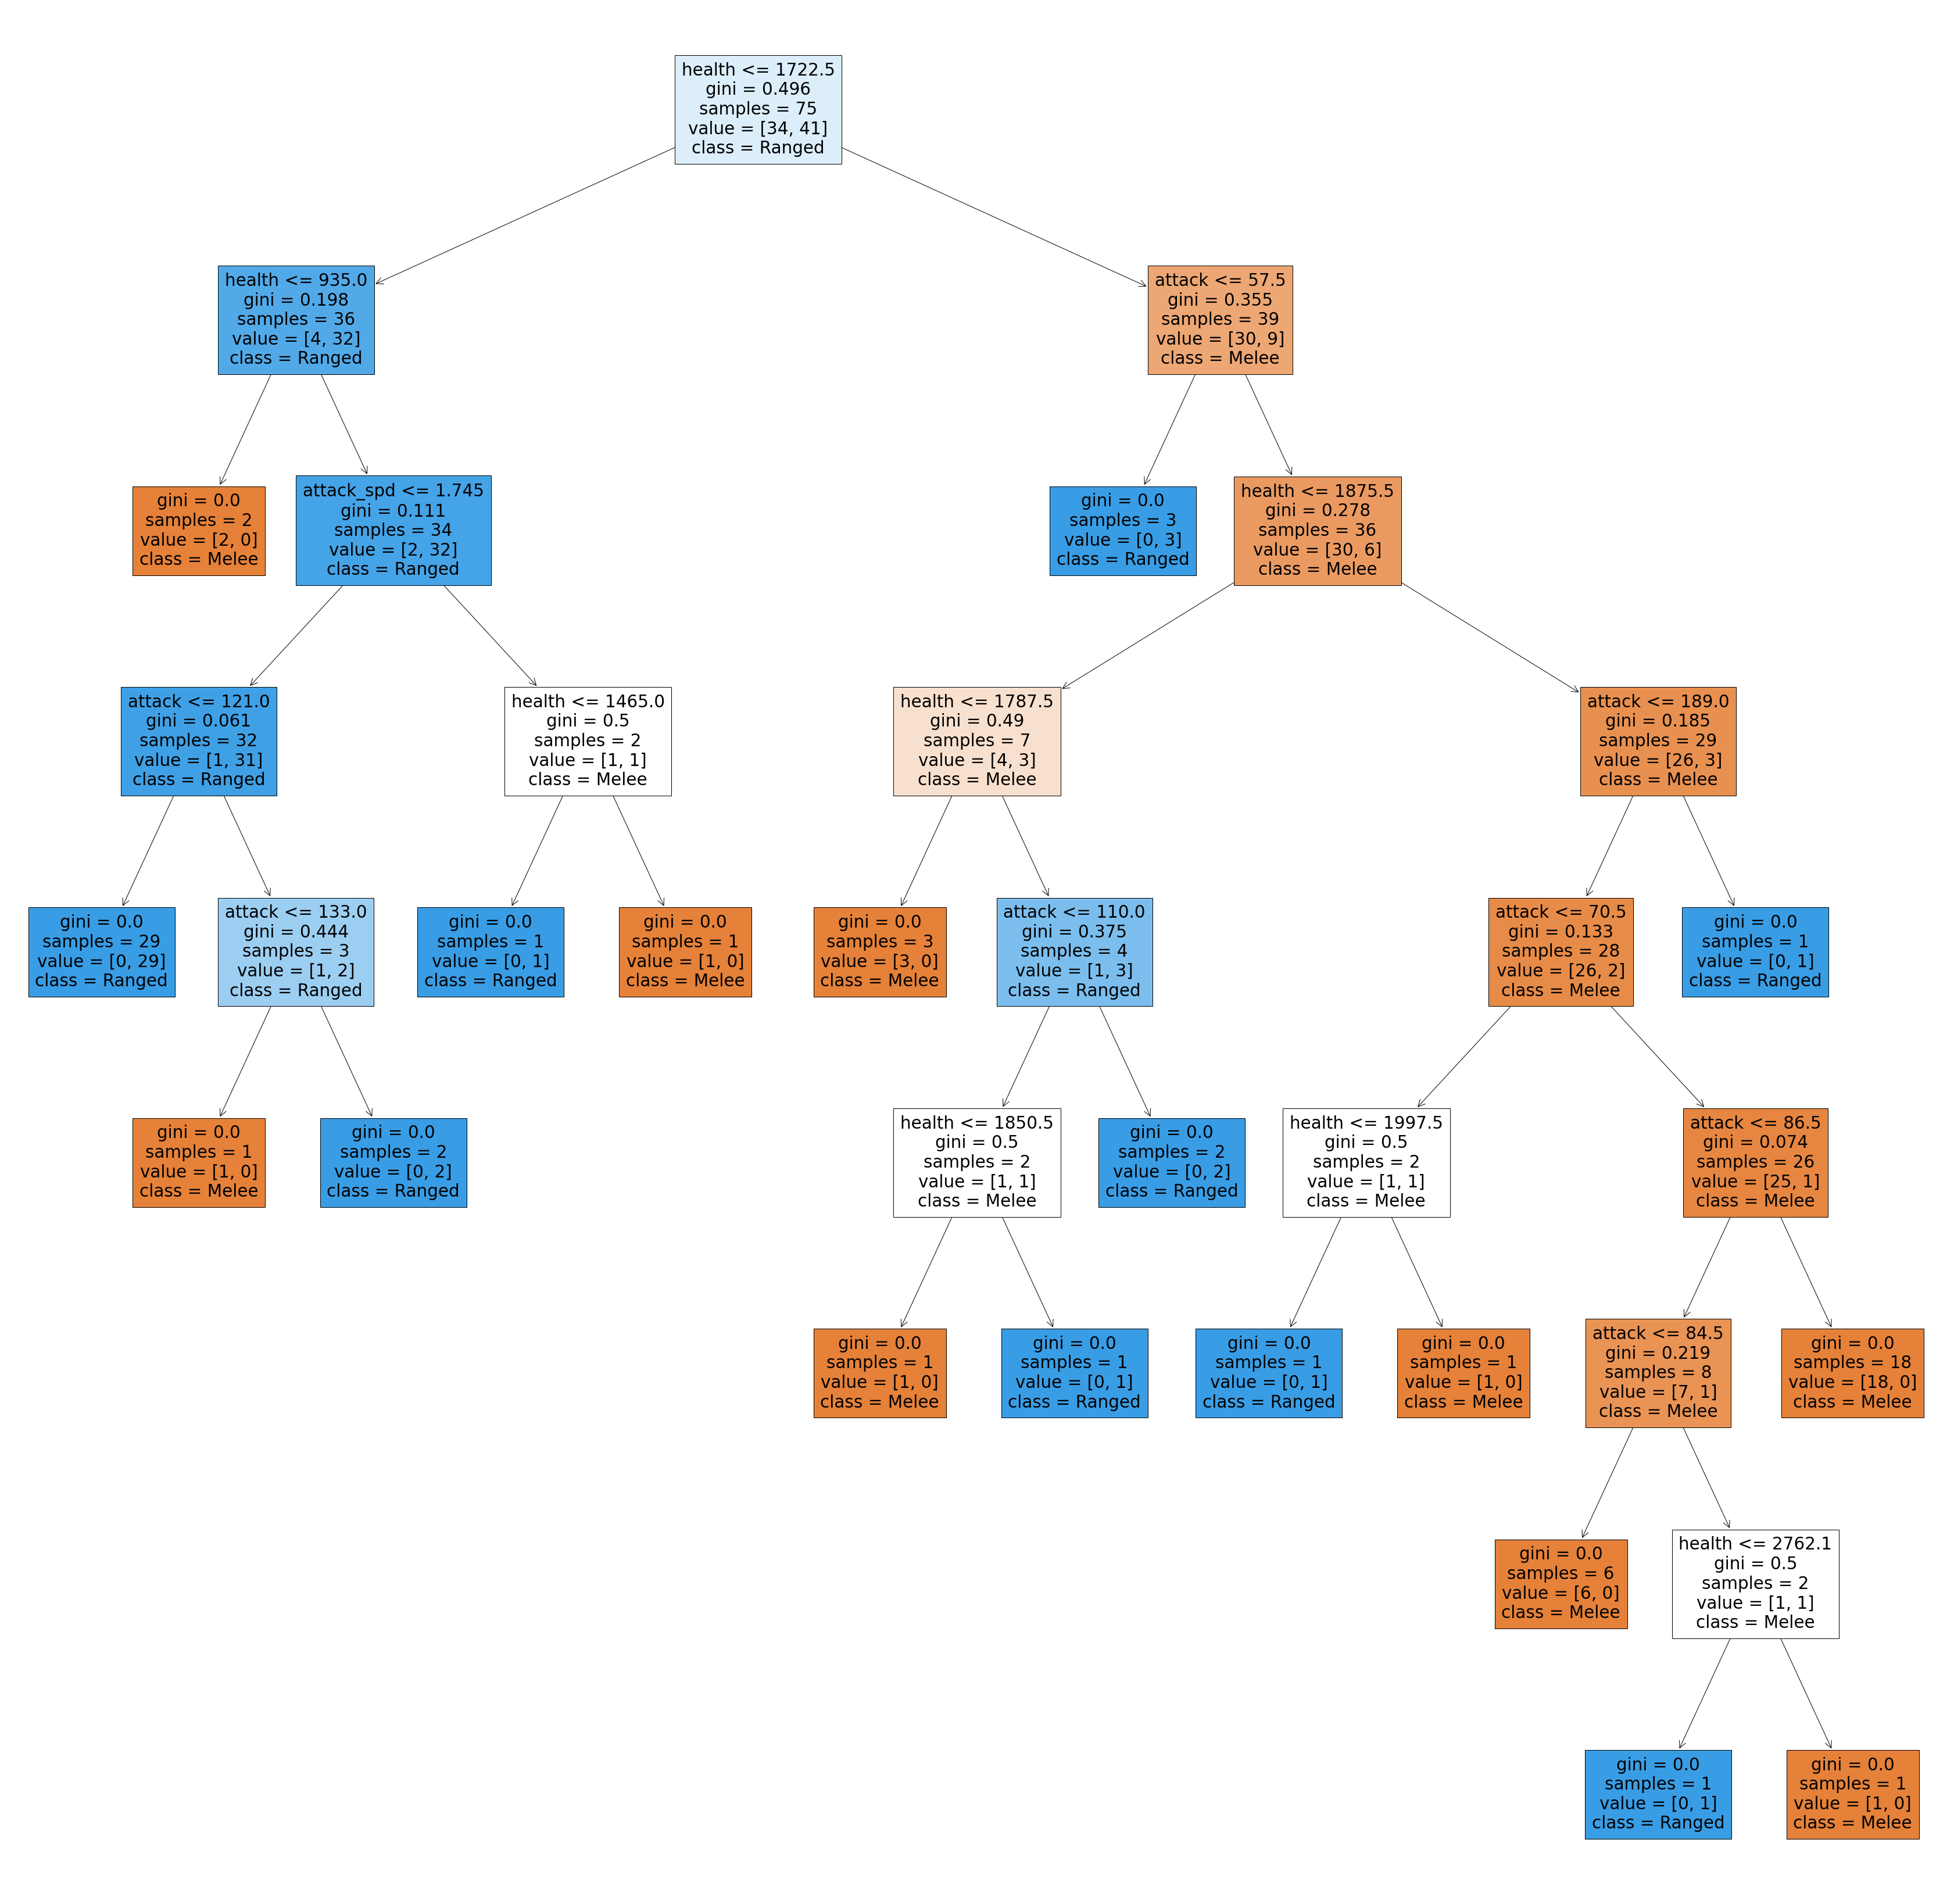

In [92]:
_, ax = plt.subplots(figsize=[60, 60])

plot_tree(
    decision_clf,
    filled=True,
    feature_names=feature_names,
    class_names=class_names,
    ax=ax,
)
print()

In [104]:
random_forest_clf, random_forest_clf_report, random_forest_cv_score = train_model(
    RandomForestClassifier(), X_train, X_test, y_train, y_test)

RandomForestClassifier()


,precision,recall,f1-score,support,model
Melee,1.000000,0.833333,0.909091,6.000000,RandomForestClassifier()
Ranged,0.750000,1.000000,0.857143,3.000000,RandomForestClassifier()
accuracy,0.888889,0.888889,0.888889,0.888889,RandomForestClassifier()
macro avg,0.875000,0.916667,0.883117,9.000000,RandomForestClassifier()
weighted avg,0.916667,0.888889,0.891775,9.000000,RandomForestClassifier()


CV score: [0.88235294 0.64705882 0.76470588 0.76470588 0.8125    ]
CV score mean: 0.7742647058823529


In [105]:
adaboost_clf, adaboost_clf_report, adaboost_cv_score = train_model(
    AdaBoostClassifier(), X_train, X_test, y_train, y_test)

AdaBoostClassifier()


,precision,recall,f1-score,support,model
Melee,1.000000,0.666667,0.800000,6.000000,AdaBoostClassifier()
Ranged,0.600000,1.000000,0.750000,3.000000,AdaBoostClassifier()
accuracy,0.777778,0.777778,0.777778,0.777778,AdaBoostClassifier()
macro avg,0.800000,0.833333,0.775000,9.000000,AdaBoostClassifier()
weighted avg,0.866667,0.777778,0.783333,9.000000,AdaBoostClassifier()


CV score: [0.76470588 0.58823529 0.82352941 0.70588235 0.8125    ]
CV score mean: 0.7389705882352942


In [106]:
grad_clf, grad_clf_report, grad_cv_score = train_model(
    GradientBoostingClassifier(), X_train, X_test, y_train, y_test)

GradientBoostingClassifier()


,precision,recall,f1-score,support,model
Melee,1.000000,0.833333,0.909091,6.000000,GradientBoostingClassifier()
Ranged,0.750000,1.000000,0.857143,3.000000,GradientBoostingClassifier()
accuracy,0.888889,0.888889,0.888889,0.888889,GradientBoostingClassifier()
macro avg,0.875000,0.916667,0.883117,9.000000,GradientBoostingClassifier()
weighted avg,0.916667,0.888889,0.891775,9.000000,GradientBoostingClassifier()


CV score: [0.94117647 0.58823529 0.76470588 0.76470588 0.6875    ]
CV score mean: 0.7492647058823529


#### 5. From the above exercise, logistic model looks the best, let's try doing random search for better hyperparams

In [109]:
distributions = {
    "C": uniform(loc=0, scale=4),
    "penalty": ['l2', 'l1']
}

randomized_clf = RandomizedSearchCV(logistic_clf, distributions)

In [110]:
randomized_clf, randomized_clf_report, randomized_cv_score = train_model(
    RandomForestClassifier(), X_train, X_test, y_train, y_test)

RandomForestClassifier()


,precision,recall,f1-score,support,model
Melee,1.000000,0.833333,0.909091,6.000000,RandomForestClassifier()
Ranged,0.750000,1.000000,0.857143,3.000000,RandomForestClassifier()
accuracy,0.888889,0.888889,0.888889,0.888889,RandomForestClassifier()
macro avg,0.875000,0.916667,0.883117,9.000000,RandomForestClassifier()
weighted avg,0.916667,0.888889,0.891775,9.000000,RandomForestClassifier()


CV score: [0.88235294 0.64705882 0.82352941 0.76470588 0.8125    ]
CV score mean: 0.7860294117647058


In [112]:
logistic_cv_clf, logistic_cv_clf_report, logistic_cv_cv_score = train_model(
    LogisticRegressionCV(), X_train, X_test, y_train, y_test)

LogisticRegressionCV()


,precision,recall,f1-score,support,model
Melee,1.000000,0.833333,0.909091,6.000000,LogisticRegressionCV()
Ranged,0.750000,1.000000,0.857143,3.000000,LogisticRegressionCV()
accuracy,0.888889,0.888889,0.888889,0.888889,LogisticRegressionCV()
macro avg,0.875000,0.916667,0.883117,9.000000,LogisticRegressionCV()
weighted avg,0.916667,0.888889,0.891775,9.000000,LogisticRegressionCV()


CV score: [0.94117647 0.76470588 0.76470588 0.82352941 0.75      ]
CV score mean: 0.8088235294117647


#### 6. From the above tests, LogisticRegressionCV is the best

In [116]:
best_model = logistic_cv_clf

with open(f"../{str(best_model)}.pkl", "wb") as fp:
    pickle.dump(best_model, fp)